# YOLO Object Detection

## Fine-tune YOLO Object Detection for Custom Dataset

In [3]:
!nvidia-smi

Wed Oct 11 10:19:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 10.2 MB/s eta 0:00:00


In [10]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 393, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

### Train YOLOv8 Model on Custom Dataset

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lYS1dXHwJcloOJXris2a")
project = rf.workspace("alex-hyams-cosqx").project("dollar-bill-detection")
dataset = project.version(20).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.196, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Dollar-Bill-Detection-20 in yolov8:: 100%|██████████| 5050/5050 [00:00<00:00, 5655.60it/s]


In [13]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 194MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Dollar-Bill-Detection-20/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

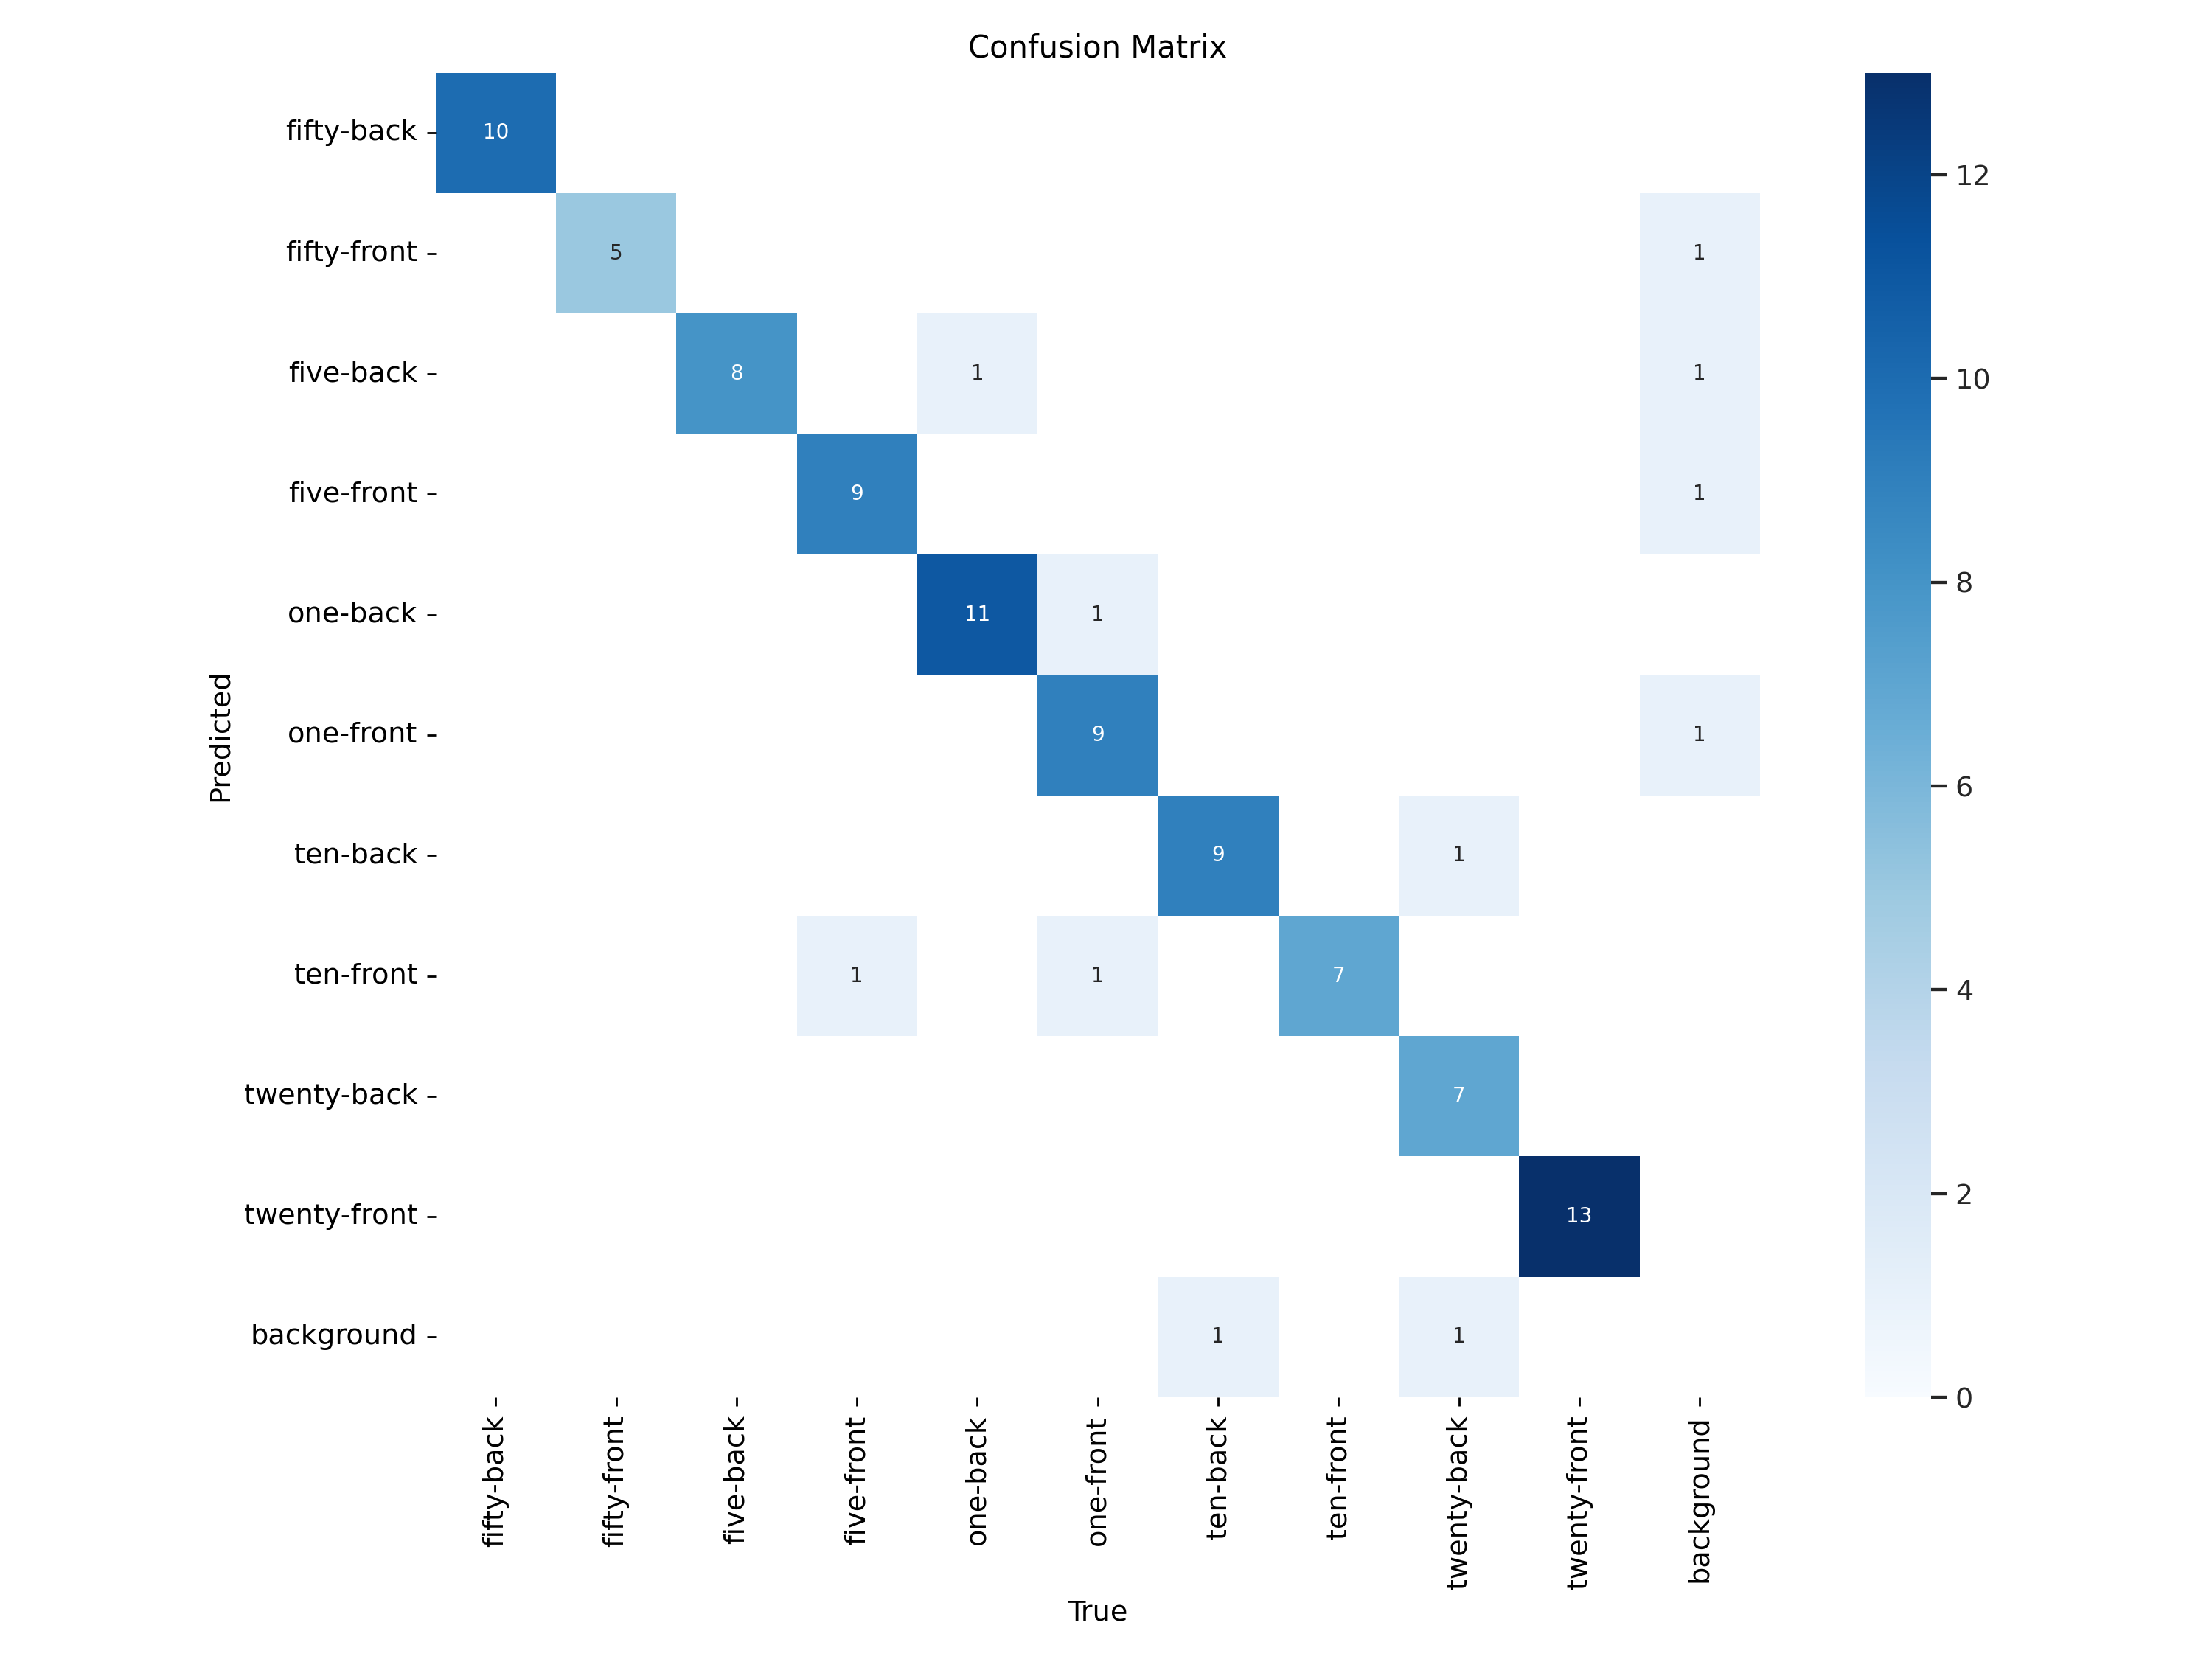

In [15]:
Image(filename= f'/content/runs/detect/train/confusion_matrix.png', width = 600)

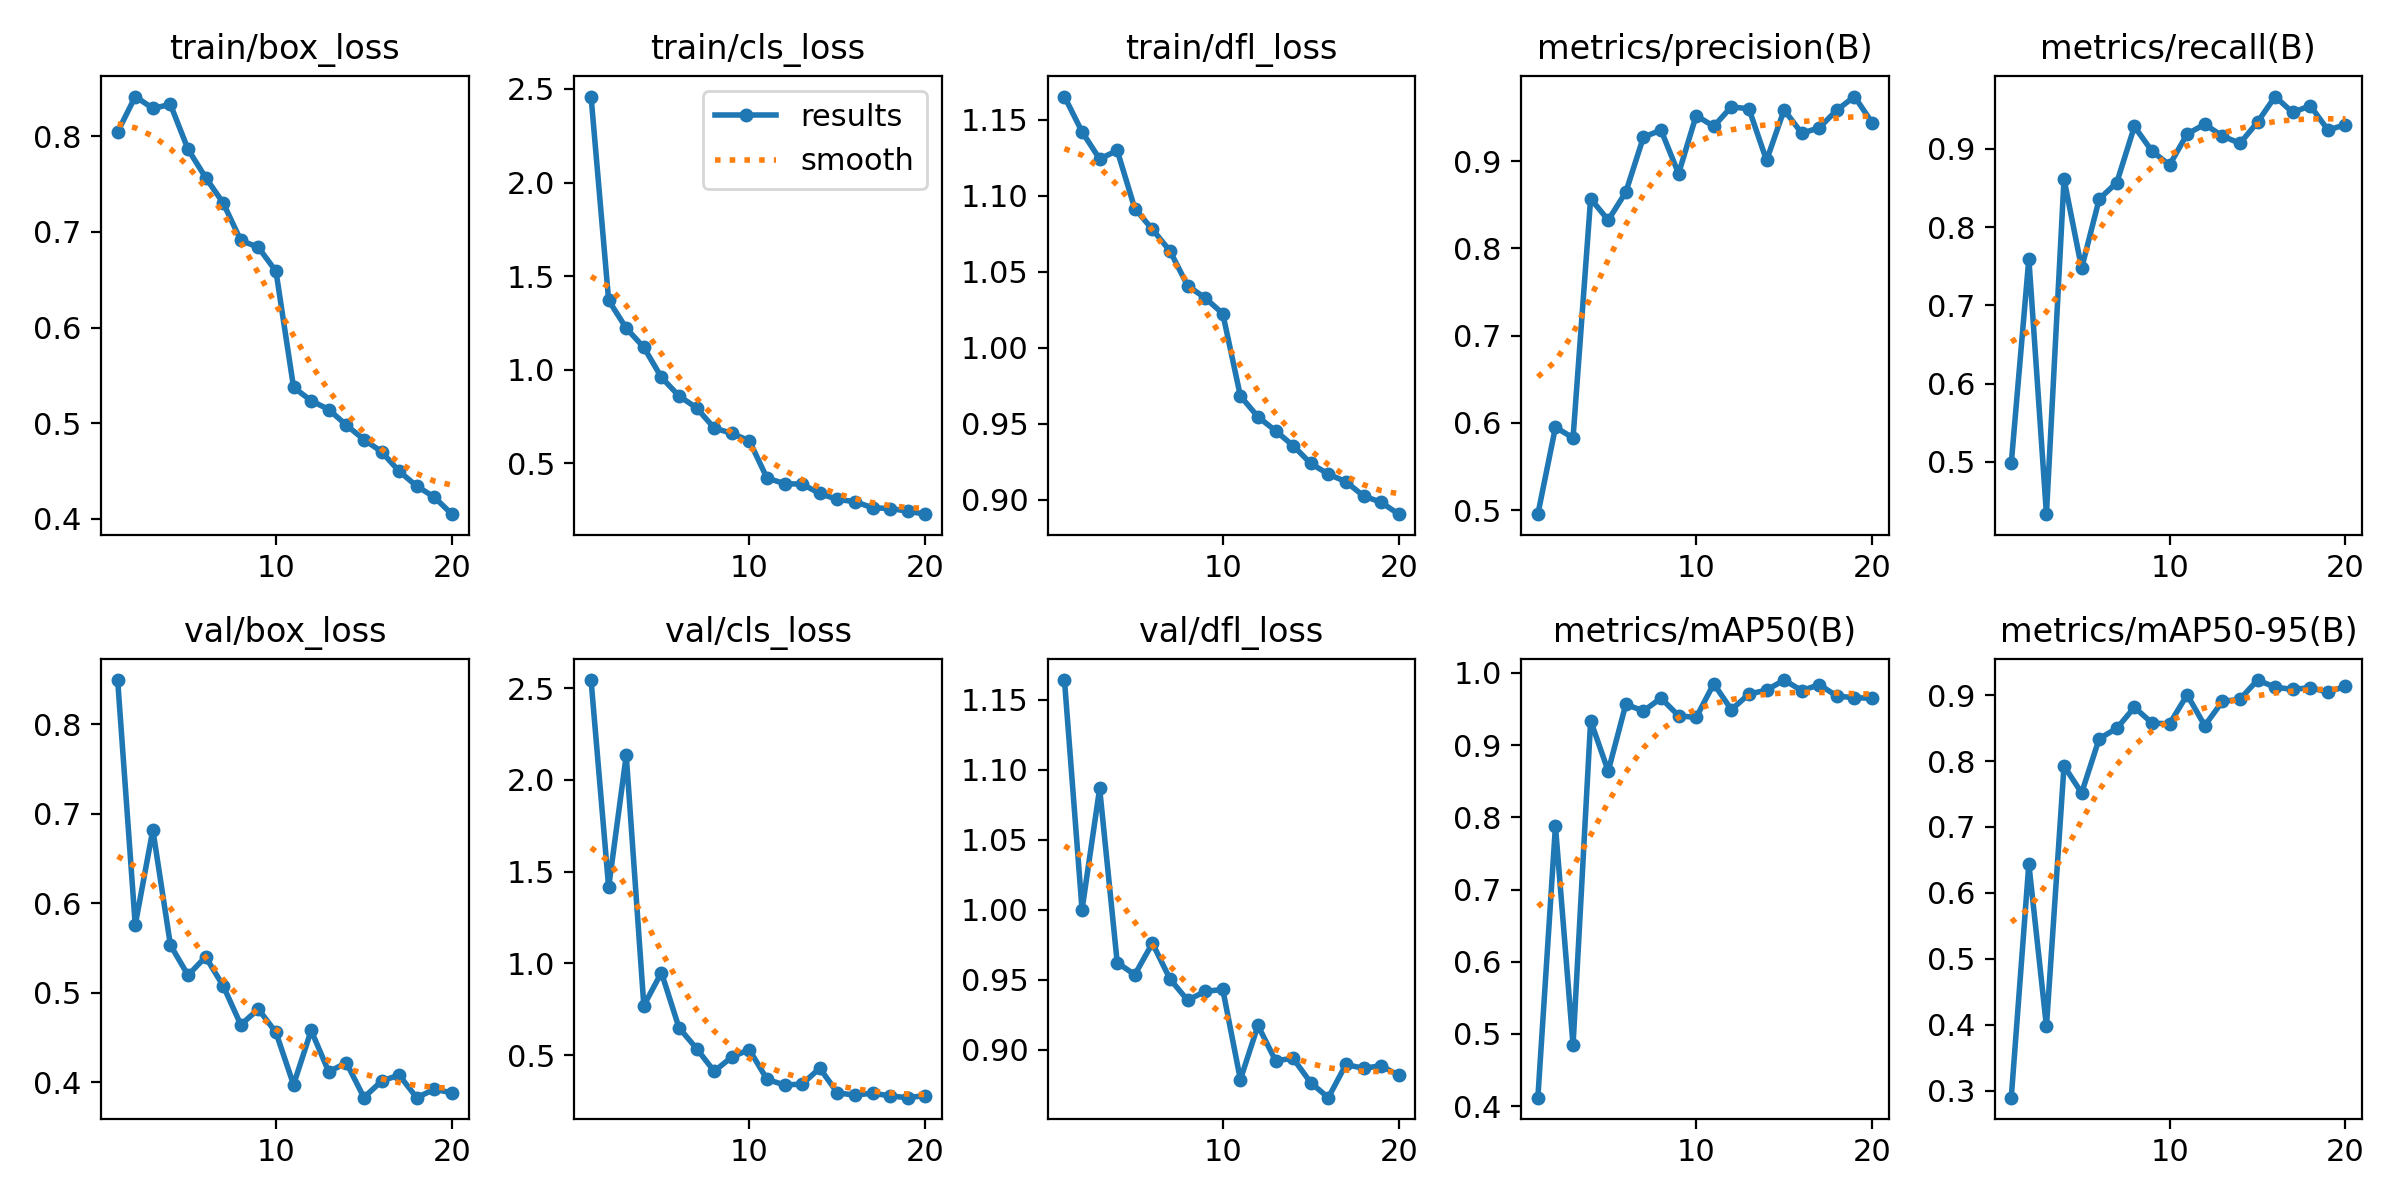

In [16]:
Image(filename= f'/content/runs/detect/train/results.png', width=600  )

In [22]:
!yolo task= detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Dollar-Bill-Detection-20/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100% 75/75 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 95. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:03<00:00,  1.25it/s]
                   all         75         95      0.959      0.934       0.99      0.922
            fifty-back         75         10      0.995          1      0.995      0.956
           fifty-front         75          5      0.984          1      0.995      0.936
             five-back         75  

In [23]:
!yolo task= detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs

image 1/44 /content/Dollar-Bill-Detection-20/test/images/IMG_1909_jpg.rf.3f2bde8dc899b141a4361677e55242e4.jpg: 640x640 1 twenty-back, 37.1ms
image 2/44 /content/Dollar-Bill-Detection-20/test/images/IMG_1911_jpg.rf.b90b1b78414e7535403e2ae58398e887.jpg: 640x640 1 twenty-back, 37.9ms
image 3/44 /content/Dollar-Bill-Detection-20/test/images/IMG_1916_jpg.rf.9ff79d6df874376b2bf440c5248a166e.jpg: 640x640 1 twenty-front, 37.0ms
image 4/44 /content/Dollar-Bill-Detection-20/test/images/IMG_1919_jpg.rf.2e943ba3e529eab0f42446e1b5d74844.jpg: 640x640 1 twenty-front, 34.8ms
image 5/44 /content/Dollar-Bill-Detection-20/test/images/IMG_1935_jpg.rf.0bf8106bcf2fef4680453d60f4c0b125.jpg: 640x640 1 twenty-back, 25.1ms
image 6/44 /content/Dollar-Bill-Detection-20/test/images/IMG_1948_jpg.rf.8e9775e3ab62fb1f11d56e19711cb7aa.jpg: 640x640 1 fi

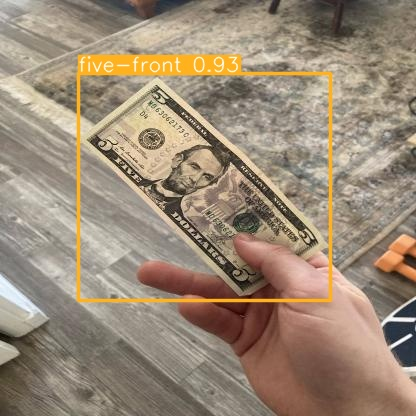

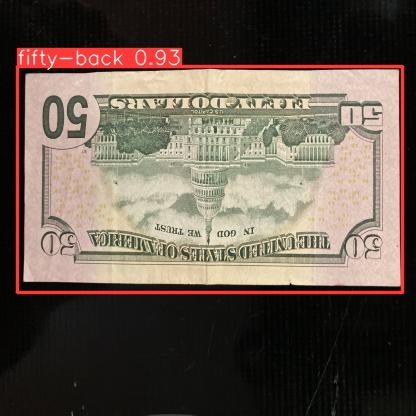

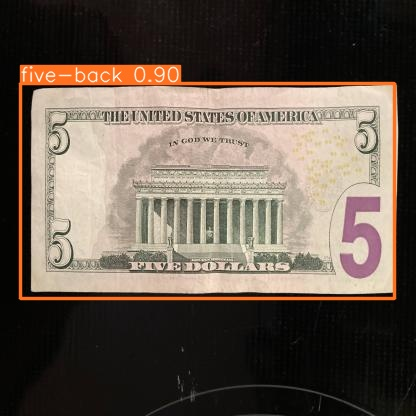

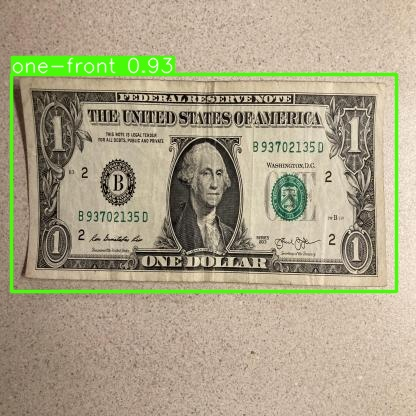

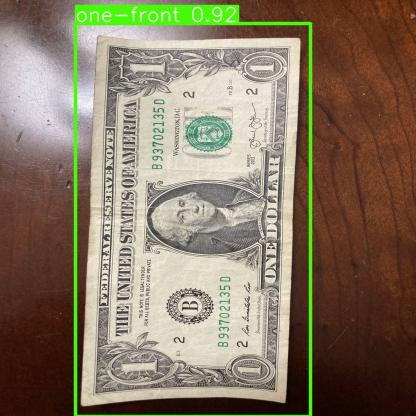

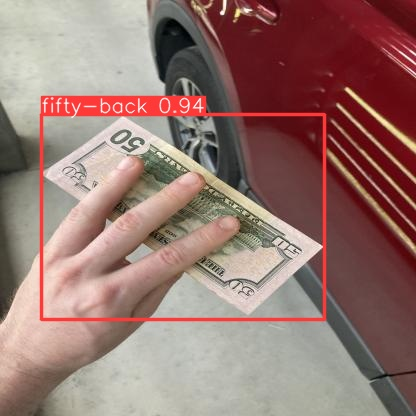

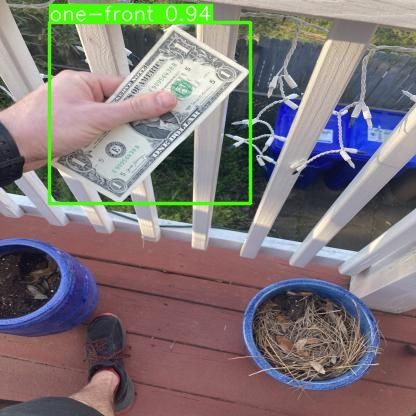

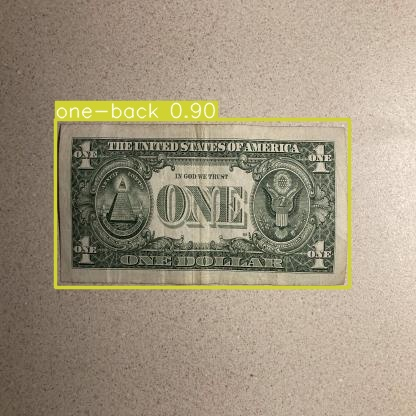

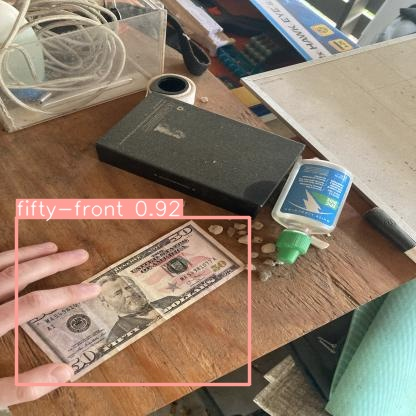

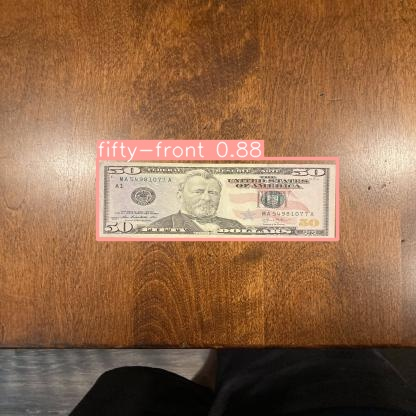

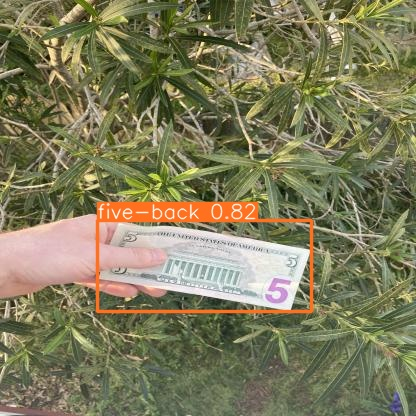

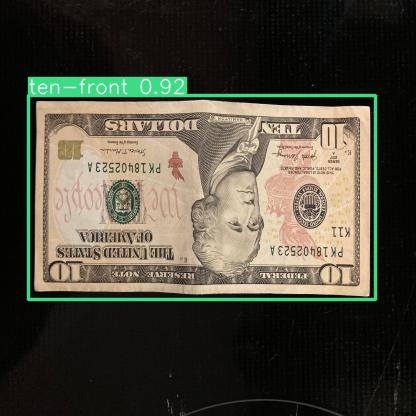

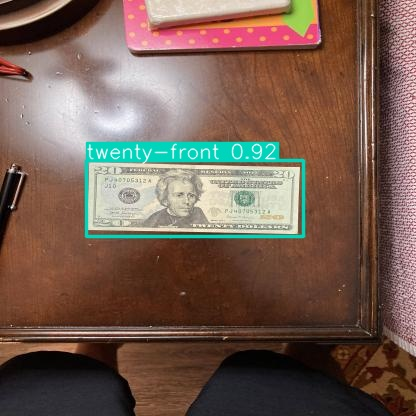

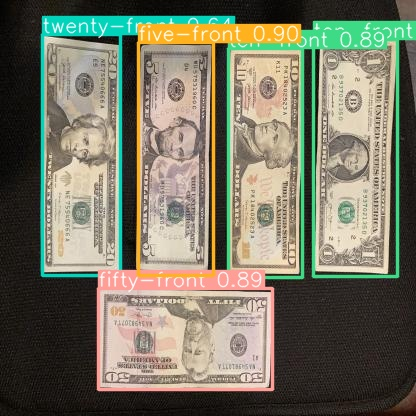

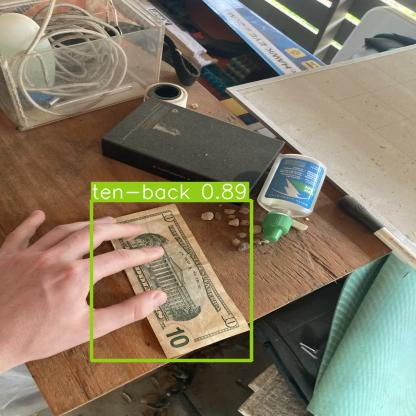

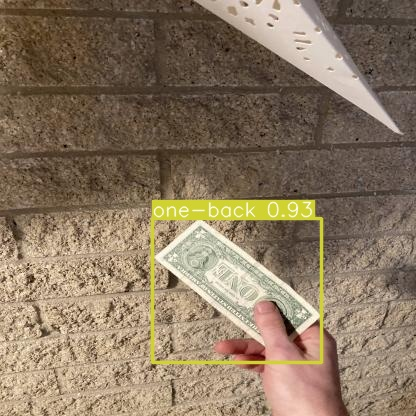

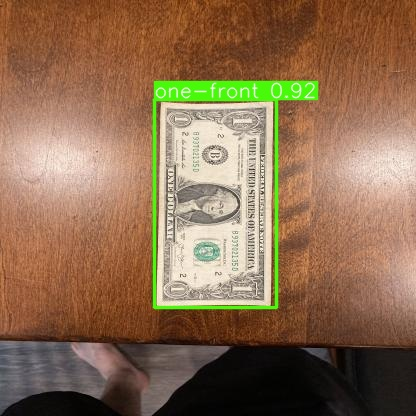

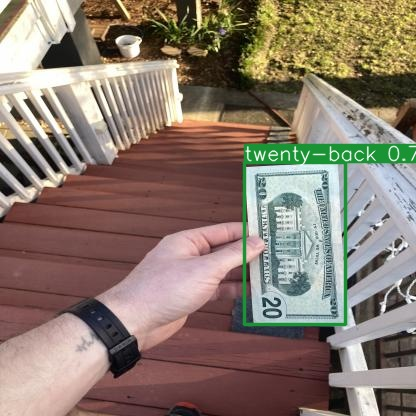

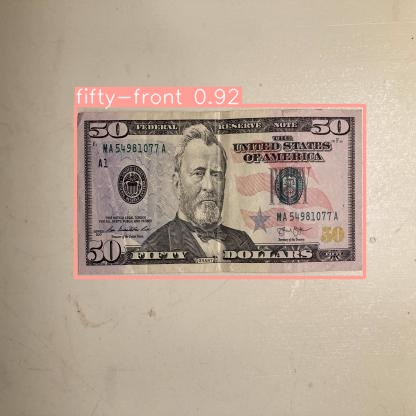

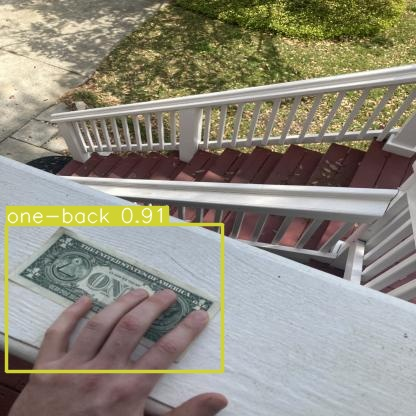

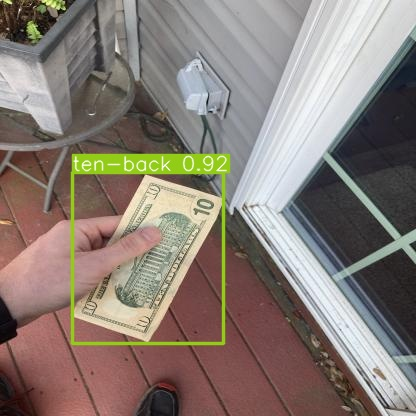

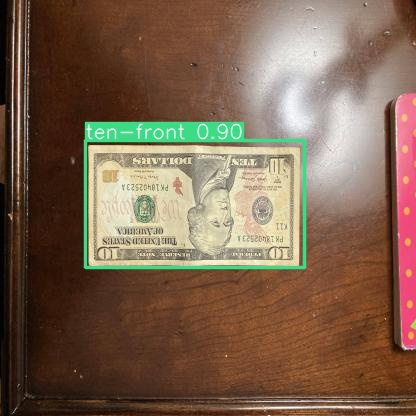

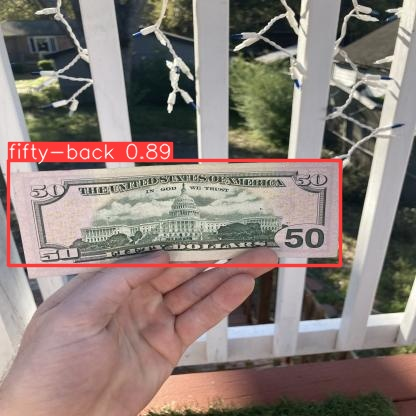

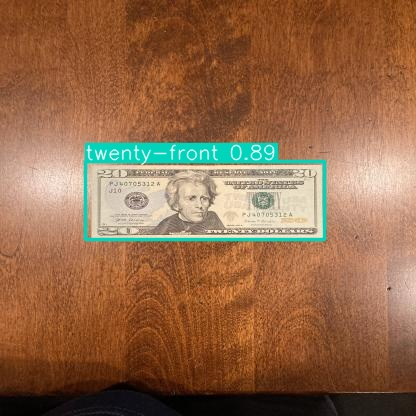

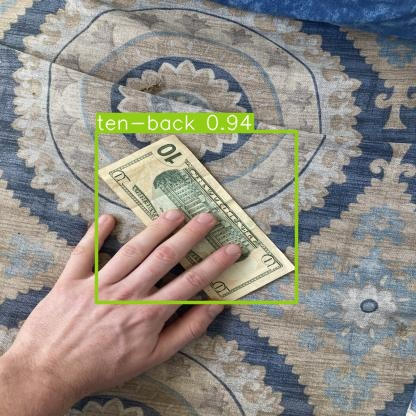

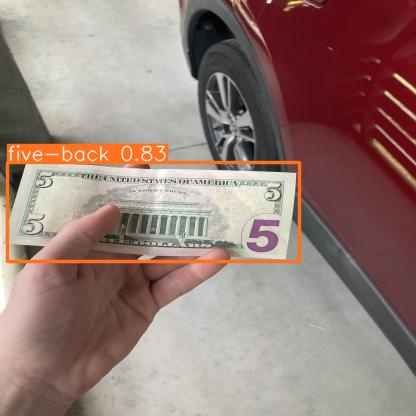

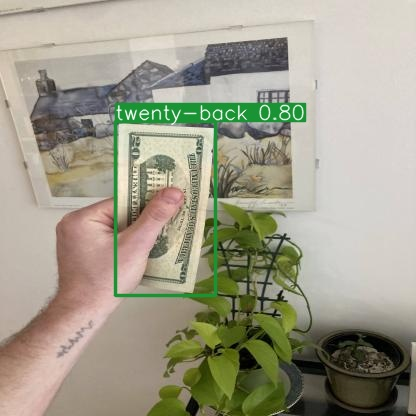

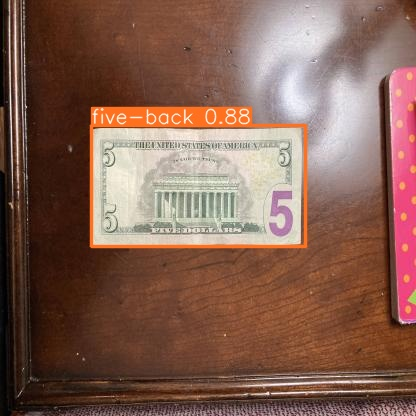

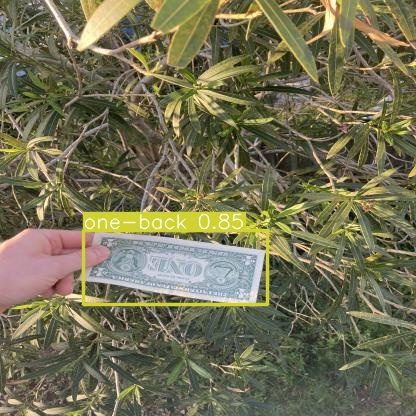

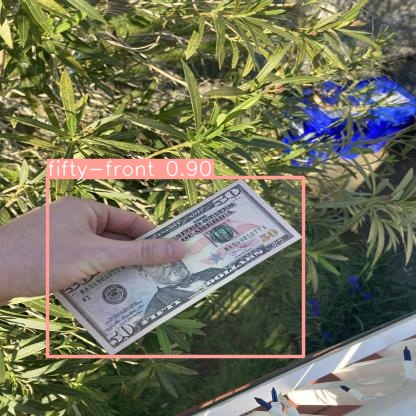

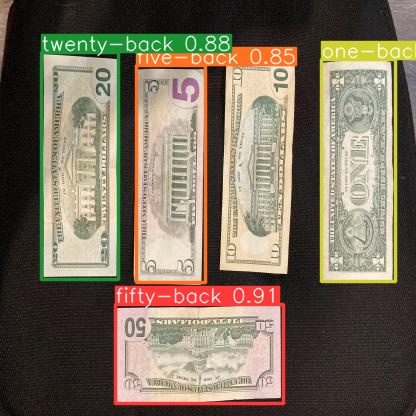

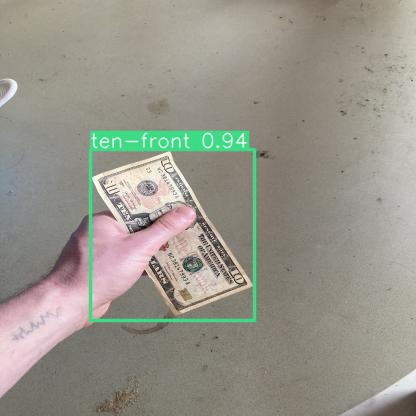

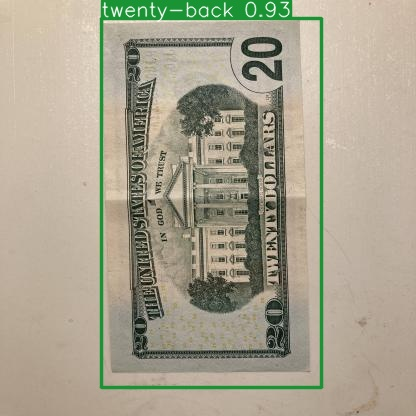

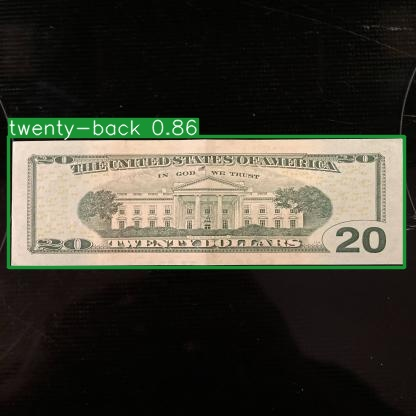

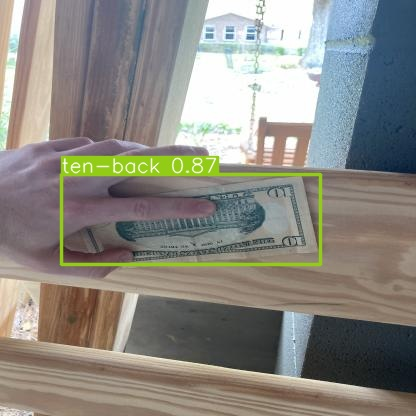

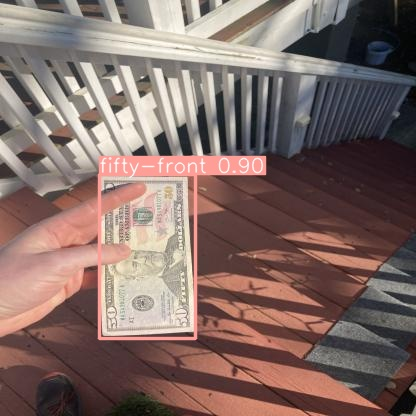

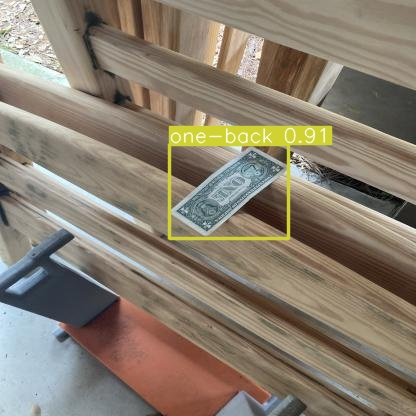

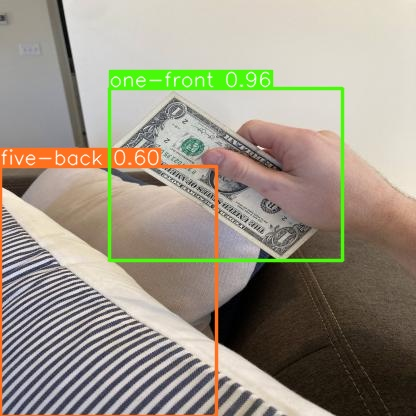

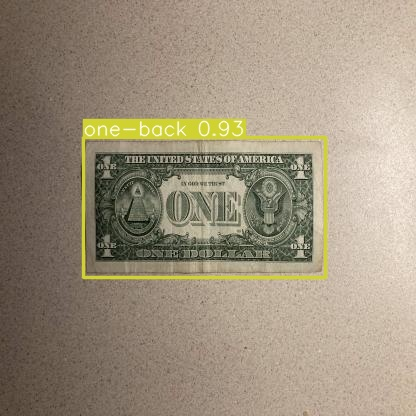

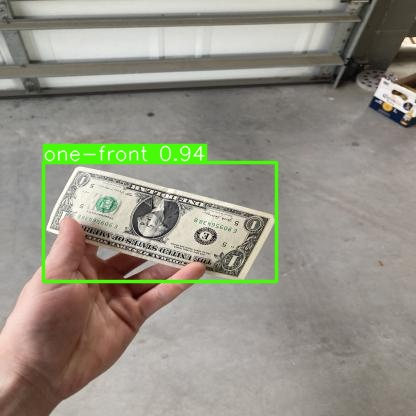

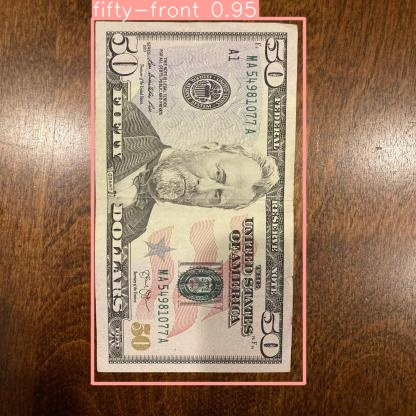

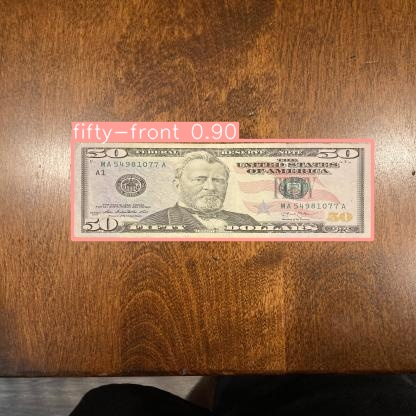

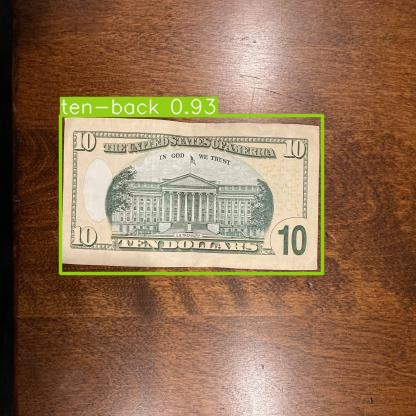

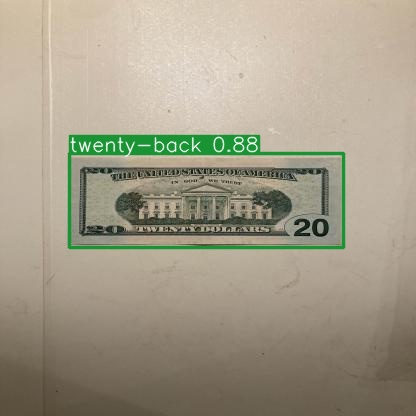

In [31]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/IMG*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

## Real-time Object Detection in Video


In [35]:
!yolo task=detect mode=predict model=yolov8m.pt source=/content/traffic.mp4

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

video 1/1 (1/145) /content/traffic.mp4: 384x640 2 cars, 117.6ms
video 1/1 (2/145) /content/traffic.mp4: 384x640 2 cars, 26.0ms
video 1/1 (3/145) /content/traffic.mp4: 384x640 3 cars, 26.0ms
video 1/1 (4/145) /content/traffic.mp4: 384x640 3 cars, 26.0ms
video 1/1 (5/145) /content/traffic.mp4: 384x640 3 cars, 26.1ms
video 1/1 (6/145) /content/traffic.mp4: 384x640 3 cars, 26.0ms
video 1/1 (7/145) /content/traffic.mp4: 384x640 3 cars, 26.0ms
video 1/1 (8/145) /content/traffic.mp4: 384x640 3 cars, 26.0ms
video 1/1 (9/145) /content/traffic.mp4: 384x640 3 cars, 26.0ms
video 1/1 (10/145) /content/traffic.mp4: 384x640 3 cars, 15.0ms
video 1/1 (11/145) /content/traffic.mp4: 384x640 3 cars, 15.0ms
video 1/1 (12/145) /content/traffic.mp4: 384x640 3 cars, 15.0ms
video 1/1 (13/145) /content/traffic.mp4: 384x640 3 cars, 15.0ms
vide